In [46]:
#import relevant libraries for the data analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, r2_score, classification_report
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline
print('libraries imported')

libraries imported


In [47]:
#import the dataset
website_url='https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv'
df= pd.read_csv(website_url)
df.info()

/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 38 columns):
SEVERITYCODE      194673 non-null int64
X                 189339 non-null float64
Y                 189339 non-null float64
OBJECTID          194673 non-null int64
INCKEY            194673 non-null int64
COLDETKEY         194673 non-null int64
REPORTNO          194673 non-null object
STATUS            194673 non-null object
ADDRTYPE          192747 non-null object
INTKEY            65070 non-null float64
LOCATION          191996 non-null object
EXCEPTRSNCODE     84811 non-null object
EXCEPTRSNDESC     5638 non-null object
SEVERITYCODE.1    194673 non-null int64
SEVERITYDESC      194673 non-null object
COLLISIONTYPE     189769 non-null object
PERSONCOUNT       194673 non-null int64
PEDCOUNT          194673 non-null int64
PEDCYLCOUNT       194673 non-null int64
VEHCOUNT          194673 non-null int64
INCDATE           194673 non-null object
INCDTTM           194673 non-null obje

In [48]:
# To Check the null or NaN in the dataset
missing_data=df.isnull()
missing_data.head()

for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print("")

SEVERITYCODE
False    194673
Name: SEVERITYCODE, dtype: int64

X
False    189339
True       5334
Name: X, dtype: int64

Y
False    189339
True       5334
Name: Y, dtype: int64

OBJECTID
False    194673
Name: OBJECTID, dtype: int64

INCKEY
False    194673
Name: INCKEY, dtype: int64

COLDETKEY
False    194673
Name: COLDETKEY, dtype: int64

REPORTNO
False    194673
Name: REPORTNO, dtype: int64

STATUS
False    194673
Name: STATUS, dtype: int64

ADDRTYPE
False    192747
True       1926
Name: ADDRTYPE, dtype: int64

INTKEY
True     129603
False     65070
Name: INTKEY, dtype: int64

LOCATION
False    191996
True       2677
Name: LOCATION, dtype: int64

EXCEPTRSNCODE
True     109862
False     84811
Name: EXCEPTRSNCODE, dtype: int64

EXCEPTRSNDESC
True     189035
False      5638
Name: EXCEPTRSNDESC, dtype: int64

SEVERITYCODE.1
False    194673
Name: SEVERITYCODE.1, dtype: int64

SEVERITYDESC
False    194673
Name: SEVERITYDESC, dtype: int64

COLLISIONTYPE
False    189769
True       4904
Name: C

In [49]:
#drop all irrelevant variables in the dataset
df = df.drop(['OBJECTID','INCKEY','LOCATION','COLDETKEY','REPORTNO','STATUS','INTKEY','EXCEPTRSNCODE','EXCEPTRSNDESC','SEVERITYDESC','INCDATE','SDOT_COLCODE','SDOT_COLDESC','SDOTCOLNUM','ST_COLCODE','ST_COLDESC','SEGLANEKEY','CROSSWALKKEY','INCDTTM'],axis=1)
df=df.drop('SEVERITYCODE.1',axis=1)
df.rename(columns={'X':'Longitude','Y':'Latitude'},inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 18 columns):
SEVERITYCODE      194673 non-null int64
Longitude         189339 non-null float64
Latitude          189339 non-null float64
ADDRTYPE          192747 non-null object
COLLISIONTYPE     189769 non-null object
PERSONCOUNT       194673 non-null int64
PEDCOUNT          194673 non-null int64
PEDCYLCOUNT       194673 non-null int64
VEHCOUNT          194673 non-null int64
JUNCTIONTYPE      188344 non-null object
INATTENTIONIND    29805 non-null object
UNDERINFL         189789 non-null object
WEATHER           189592 non-null object
ROADCOND          189661 non-null object
LIGHTCOND         189503 non-null object
PEDROWNOTGRNT     4667 non-null object
SPEEDING          9333 non-null object
HITPARKEDCAR      194673 non-null object
dtypes: float64(2), int64(5), object(11)
memory usage: 26.7+ MB


In [50]:
#drop the columns with too much missing values
df = df.drop(["INATTENTIONIND","PEDROWNOTGRNT","SPEEDING"],axis=1)

#handle the typo and unclear value with NaN and drop it
df.replace(r'^\s*$', np.nan, regex=True)
df.replace("Unknown", np.nan, inplace = True)
df.replace("Other", np.nan, inplace = True)

#drop the missing values in the rest columns
df.dropna(subset=["Longitude","Latitude","COLLISIONTYPE","JUNCTIONTYPE","UNDERINFL","WEATHER","ROADCOND","LIGHTCOND"], axis=0, inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143747 entries, 0 to 194672
Data columns (total 15 columns):
SEVERITYCODE     143747 non-null int64
Longitude        143747 non-null float64
Latitude         143747 non-null float64
ADDRTYPE         143747 non-null object
COLLISIONTYPE    143747 non-null object
PERSONCOUNT      143747 non-null int64
PEDCOUNT         143747 non-null int64
PEDCYLCOUNT      143747 non-null int64
VEHCOUNT         143747 non-null int64
JUNCTIONTYPE     143747 non-null object
UNDERINFL        143747 non-null object
WEATHER          143747 non-null object
ROADCOND         143747 non-null object
LIGHTCOND        143747 non-null object
HITPARKEDCAR     143747 non-null object
dtypes: float64(2), int64(5), object(8)
memory usage: 17.5+ MB


In [51]:
df['SEVERITYCODE'].value_counts()

#creating a balanced dataset
df= df.sample(frac=1,random_state=0,replace=False)

#separate code 2  from original dataset.
df_code2 = df.loc[df['SEVERITYCODE'] == 2]

#select 58188 observations from the severity code 1(it has more values than code 2)
df_code1 = df.loc[df['SEVERITYCODE'] == 1].sample(n=48926,random_state=42)

#get balanced dataset
df_balanced = pd.concat([df_code1,df_code2])
df_balanced = df_balanced.sample(frac=1,random_state=0,replace=False)

#Replacing 0 with N and 1 with Y as this column has mixed datatype values, making it consistent
df_balanced['UNDERINFL'] = df_balanced['UNDERINFL'].replace(['0'],'N')
df_balanced['UNDERINFL'] = df_balanced['UNDERINFL'].replace(['1'],'Y')

#checking if dataset balanced
df_balanced.info()
df_balanced['SEVERITYCODE'].value_counts()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97852 entries, 139054 to 72625
Data columns (total 15 columns):
SEVERITYCODE     97852 non-null int64
Longitude        97852 non-null float64
Latitude         97852 non-null float64
ADDRTYPE         97852 non-null object
COLLISIONTYPE    97852 non-null object
PERSONCOUNT      97852 non-null int64
PEDCOUNT         97852 non-null int64
PEDCYLCOUNT      97852 non-null int64
VEHCOUNT         97852 non-null int64
JUNCTIONTYPE     97852 non-null object
UNDERINFL        97852 non-null object
WEATHER          97852 non-null object
ROADCOND         97852 non-null object
LIGHTCOND        97852 non-null object
HITPARKEDCAR     97852 non-null object
dtypes: float64(2), int64(5), object(8)
memory usage: 11.9+ MB


2    48926
1    48926
Name: SEVERITYCODE, dtype: int64

In [52]:
A = df_balanced.iloc[:,1:]
#Encoding Categorical Features - Training Dataset
A = pd.get_dummies(data=A, columns=['ADDRTYPE','COLLISIONTYPE','JUNCTIONTYPE','WEATHER','ROADCOND','LIGHTCOND','UNDERINFL','HITPARKEDCAR'])

B = df_balanced[['SEVERITYCODE']]
A.info()
A_train, A_test, B_train, B_test = train_test_split(A,B,test_size=0.2,random_state=0)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97852 entries, 139054 to 72625
Data columns (total 50 columns):
Longitude                                                         97852 non-null float64
Latitude                                                          97852 non-null float64
PERSONCOUNT                                                       97852 non-null int64
PEDCOUNT                                                          97852 non-null int64
PEDCYLCOUNT                                                       97852 non-null int64
VEHCOUNT                                                          97852 non-null int64
ADDRTYPE_Block                                                    97852 non-null uint8
ADDRTYPE_Intersection                                             97852 non-null uint8
COLLISIONTYPE_Angles                                              97852 non-null uint8
COLLISIONTYPE_Cycles                                              97852 non-null uint8
COLLISIONTYP

In [53]:
#Scaling training data as per the requirements
scaler = StandardScaler()
A_train[['Longitude','Latitude','PERSONCOUNT','PEDCOUNT','PEDCYLCOUNT','VEHCOUNT']] = scaler.fit_transform(A_train[['Longitude','Latitude','PERSONCOUNT','PEDCOUNT','PEDCYLCOUNT','VEHCOUNT']])

#Scaling test data as per the requirements
scaler = StandardScaler()
A_test[['Longitude','Latitude','PERSONCOUNT','PEDCOUNT','PEDCYLCOUNT','VEHCOUNT']] = scaler.fit_transform(A_test[['Longitude','Latitude','PERSONCOUNT','PEDCOUNT','PEDCYLCOUNT','VEHCOUNT']])

A_train.info()

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78281 entries, 157089 to 61252
Data columns (total 50 columns):
Longitude                                                         78281 non-null float64
Latitude                                                          78281 non-null float64
PERSONCOUNT                                                       78281 non-null float64
PEDCOUNT                                                          78281 non-null float64
PEDCYLCOUNT                                                       78281 non-null float64
VEHCOUNT                                                          78281 non-null float64
ADDRTYPE_Block                                                    78281 non-null uint8
ADDRTYPE_Intersection                                             78281 non-null uint8
COLLISIONTYPE_Angles                                              78281 non-null uint8
COLLISIONTYPE_Cycles                                              78281 non-null uint8
COLL

In [54]:
df_corr = pd.concat([B_train,A_train])
df_corr = df_corr.corr()
df_corr.style.background_gradient(cmap='coolwarm').set_precision(2)

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  if __name__ == '__main__':
/opt/conda/envs/Python36/lib/python3.6/site-packages/numpy/core/_methods.py:32: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial)
/opt/conda/envs/Python36/lib/python3.6/site-packages/numpy/core/_methods.py:28: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial)
/opt/conda/envs/Python36/lib/python3.6/site-packages/matplotlib/colors.py:512: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


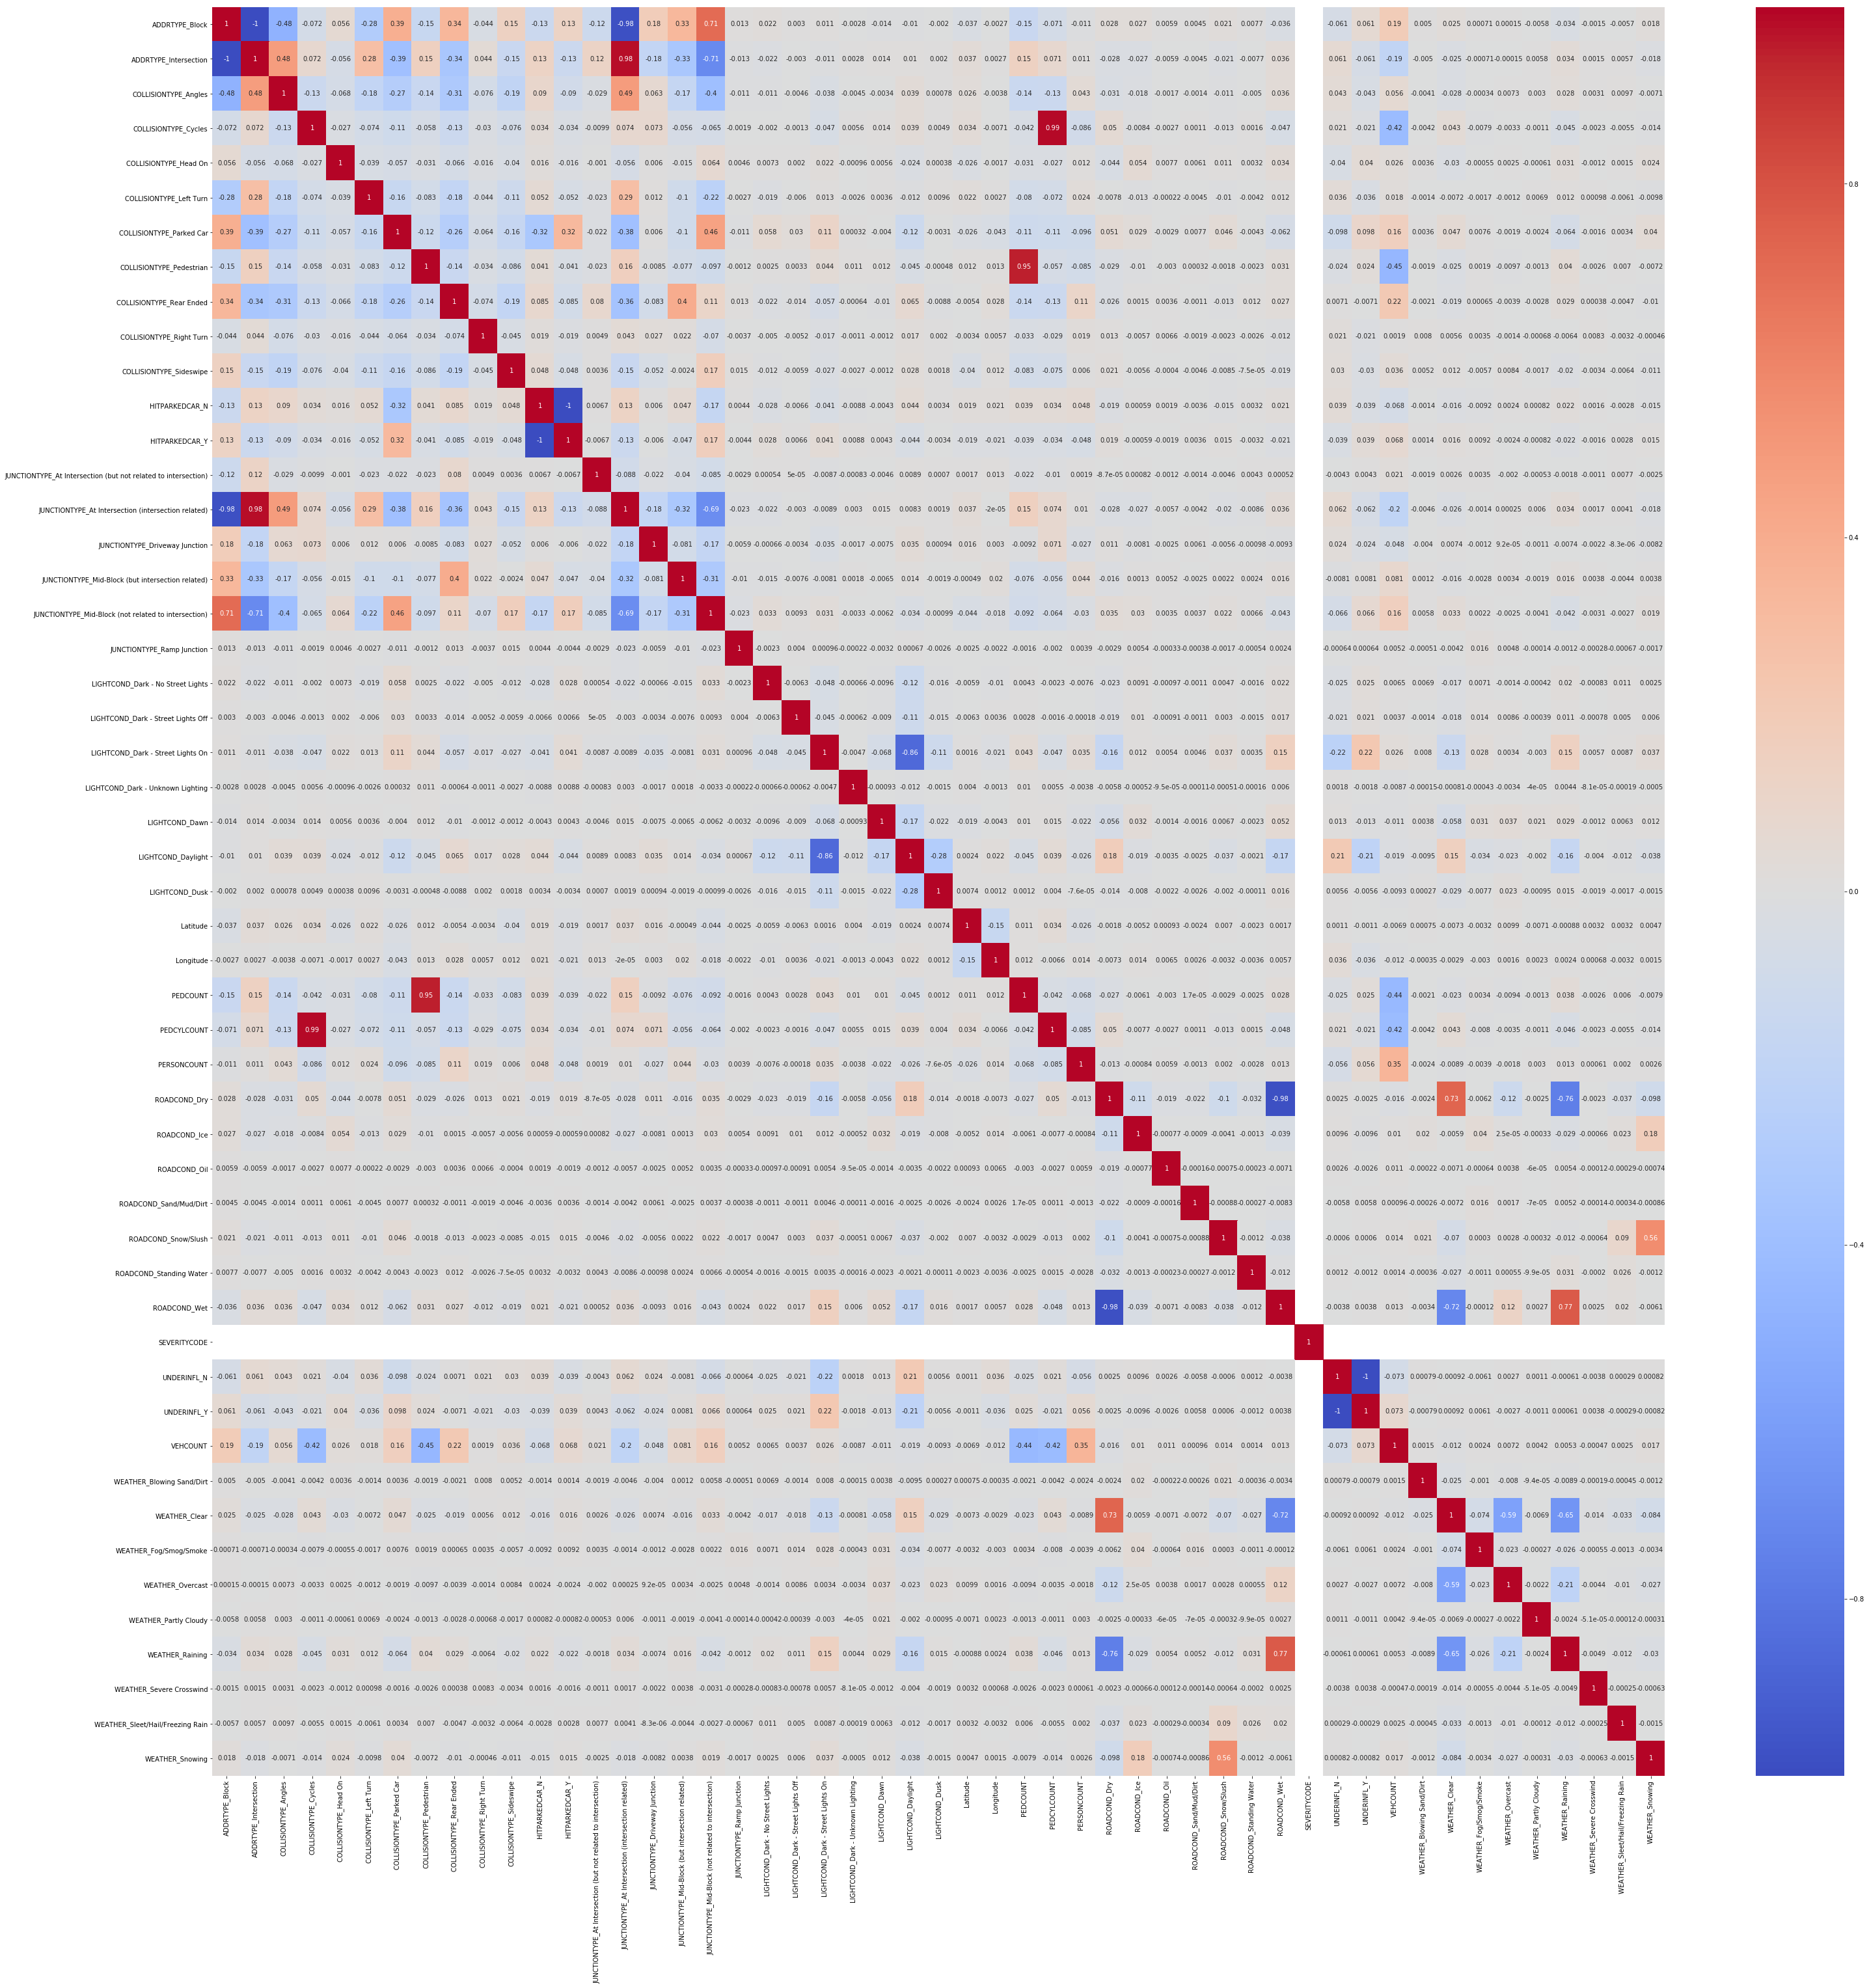

In [55]:
plt.figure(figsize=(50,50))
seaborn.heatmap(df_corr,annot=True,cmap='coolwarm')
plt.savefig('correlation.png')


In [56]:
# Apply the Machine Learning Algorithm
## LogisticRegression FOR THE FOLLOWING ANALYSIS
#Fitting and Predictions
lr = LogisticRegression(random_state = 0)
lr.fit(A_train,B_train)
lr_predictions = lr.predict(A_test)

#Confusion Matrix
lr_cm = confusion_matrix(B_test,lr_predictions)
print(lr_cm,'\n')

#Classification Report
lr_cr = classification_report(B_test,lr_predictions)
print(lr_cr,'\n')

#Accuracy
acc = accuracy_score(B_test,lr_predictions)
print(acc,'\n')
accDict = {}
accDict['LR'] = acc

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[5351 4496]
 [1504 8220]] 

              precision    recall  f1-score   support

           1       0.78      0.54      0.64      9847
           2       0.65      0.85      0.73      9724

   micro avg       0.69      0.69      0.69     19571
   macro avg       0.71      0.69      0.69     19571
weighted avg       0.71      0.69      0.69     19571
 

0.6934239435900056 



In [57]:
## KNeighborsClassifier for the Machine Learning process

#Fitting and Predictions
knn = KNeighborsClassifier()
params = {'n_neighbors':[3,4,5,6,7],
          'p':[1,2]}
knn1 = GridSearchCV(knn, param_grid=params)
knn1.fit(A_train,B_train.values.ravel())
knn_predictions = knn1.predict(A_test)

print('Best Hyperparameter KNN : ',knn1.best_params_)

#Confusion Matrix
knn_cm = confusion_matrix(B_test,knn_predictions)
print(knn_cm,'\n')

#Classification Report
knn_cr = classification_report(B_test,knn_predictions)
print(knn_cr,'\n')

#Accuracy
acc = accuracy_score(B_test,knn_predictions)
print(acc,'\n')
accDict['KNN'] = acc


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Best Hyperparameter KNN :  {'n_neighbors': 7, 'p': 2}
[[6465 3382]
 [3053 6671]] 

              precision    recall  f1-score   support

           1       0.68      0.66      0.67      9847
           2       0.66      0.69      0.67      9724

   micro avg       0.67      0.67      0.67     19571
   macro avg       0.67      0.67      0.67     19571
weighted avg       0.67      0.67      0.67     19571
 

0.671197179500281 



In [58]:
#Bayes
nb = GaussianNB()
nb.fit(A_train,B_train)
nb_predictions = nb.predict(A_test)

#Confusion Matrix
nb_cm=confusion_matrix(B_test,nb_predictions)
print(nb_cm,'\n')

#Classification Report
nb_cr = classification_report(B_test,nb_predictions)
print(nb_cr,'\n')

#Accuracy
acc = accuracy_score(B_test,nb_predictions)
print(acc,'\n')
accDict['NB'] = acc

[[9473  374]
 [7161 2563]] 

              precision    recall  f1-score   support

           1       0.57      0.96      0.72      9847
           2       0.87      0.26      0.40      9724

   micro avg       0.61      0.61      0.61     19571
   macro avg       0.72      0.61      0.56     19571
weighted avg       0.72      0.61      0.56     19571
 

0.6149915691584488 



/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [59]:
#Decision Tree 
#Fitting and Predictions
dtc = DecisionTreeClassifier()
params = {'criterion':['gini', 'entropy'], 
          'random_state':[0]}
dtc1 = GridSearchCV(dtc, param_grid=params)
dtc1.fit(A_train,B_train)
dtc_predictions = dtc1.predict(A_test)
print('Best Hyperparameter DTC : ',dtc1.best_params_)

#Confusion Matrix
dtc_cm=confusion_matrix(B_test,dtc_predictions)
print(dtc_cm,'\n')

#Classification Report
dtc_cr = classification_report(B_test,dtc_predictions)
print(dtc_cr,'\n')

#Accuracy
acc = accuracy_score(B_test,dtc_predictions)
print(acc,'\n')
accDict['DTC'] = acc

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Best Hyperparameter DTC :  {'criterion': 'entropy', 'random_state': 0}
[[6296 3551]
 [3783 5941]] 

              precision    recall  f1-score   support

           1       0.62      0.64      0.63      9847
           2       0.63      0.61      0.62      9724

   micro avg       0.63      0.63      0.63     19571
   macro avg       0.63      0.63      0.63     19571
weighted avg       0.63      0.63      0.63     19571
 

0.6252618670481835 



In [60]:
##random forest model
#Fitting and Predictions
rf = RandomForestClassifier()
params = {'n_estimators':[50,75,100],
          'criterion':['gini', 'entropy'], 
          'random_state':[0]}
rf1 = GridSearchCV(rf, param_grid=params)
rf1.fit(A_train,B_train)
rf_predictions = rf1.predict(A_test)
print('Best Hyperparameter RFT : ',rf1.best_params_)

#Confusion Matrix
rf_cm=confusion_matrix(B_test,rf_predictions)
print(rf_cm,'\n')

#Classification Report
rf_cr = classification_report(B_test,rf_predictions)
print(rf_cr,'\n')

#Accuracy
acc = accuracy_score(B_test,rf_predictions)
print(acc,'\n')
accDict['RFT'] = acc

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWa

Best Hyperparameter RFT :  {'criterion': 'entropy', 'n_estimators': 100, 'random_state': 0}
[[6421 3426]
 [3124 6600]] 

              precision    recall  f1-score   support

           1       0.67      0.65      0.66      9847
           2       0.66      0.68      0.67      9724

   micro avg       0.67      0.67      0.67     19571
   macro avg       0.67      0.67      0.67     19571
weighted avg       0.67      0.67      0.67     19571
 

0.6653211384190895 



In [61]:
#Fitting and Predictions
svc = SVC()
params = {'kernel':['linear','rbf'], 
          'random_state':[0]}
svc1 = GridSearchCV(svc, param_grid=params)
svc1.fit(A_train,B_train)
svc_predictions = svc1.predict(A_test)
print('Best Hyperparameter SVM : ',svc1.best_params_)

#Confusion Matrix
svc_cm=confusion_matrix(B_test,svc_predictions)
print(svc_cm,'\n')

#Classification Report
svc_cr = classification_report(B_test,svc_predictions)
print(svc_cr,'\n')

#Accuracy
acc = accuracy_score(B_test,svc_predictions)
print(acc,'\n')
accDict['SVC'] = acc

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expec

Best Hyperparameter SVM :  {'kernel': 'rbf', 'random_state': 0}
[[5184 4663]
 [1360 8364]] 

              precision    recall  f1-score   support

           1       0.79      0.53      0.63      9847
           2       0.64      0.86      0.74      9724

   micro avg       0.69      0.69      0.69     19571
   macro avg       0.72      0.69      0.68     19571
weighted avg       0.72      0.69      0.68     19571
 

0.6922487353737673 



In [62]:
accDict = sorted(accDict.items(), key=lambda x: x[1], reverse=True)
dict1 = {}
for elem in accDict:
    dict1[elem[0]] = elem[1]
Algorithms = dict1.keys()
Accuracy = dict1.values()
plt.figure(figsize=(10,8),color='slateblue')
plt.bar(Algorithms, Accuracy)
plt.xlabel('Machine Learning Models')
plt.yticks(np.arange(0,max(Accuracy)+0.1,0.05))
plt.ylabel('Accuracy')
plt.title('Models Accuracy Comparision')
plt.show()

TypeError: __init__() got an unexpected keyword argument 'color'